# EDA

In [1]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

In [11]:
# CSV REader and combiner helper fn
feat_list = ['District', 'Mandal', 'Date', 'Rain (mm)', 'Min Temp (°C)',
       'Max Temp (°C)', 'Min Humidity (%)', 'Max Humidity (%)',
       'Min Wind Speed (Kmph)', 'Max Wind Speed (Kmph)']
       
def reader(year):
    df_combined = pd.DataFrame()
    for name in glob.glob('Data/'+str(year)+'/*'):
        try:
            df1 = pd.read_csv(name)
            df1.columns = feat_list
        except: 
            df1 = pd.read_excel(name)
            df1.columns = feat_list
        df_combined = pd.concat([df_combined,df1])
        
    return df_combined

In [12]:
# Mandal Creater and data cleaner helper fn

city = ["Adilabad", "Nizamabad", "Warangal Rural", 'Warangal Urban', "Karimnagar","Khammam","Warangal"]

def mandal_creater(year, df_combined, usable=False,Year=None):
    base_dir = "Mandals/"+str(year)+"/"
    if usable == True:
        base_dir = base_dir = "Mandals_usable/"+str(year)+"/"
    for name in city:
        df_ = df_combined[df_combined["District"] == name]
        if df_.empty == True:
            continue
        os.makedirs(base_dir+str(name)+'/')
        for mands in df_["Mandal"].unique():
            df__ = df_[df_["Mandal"] == mands]
            df__ = df__.drop_duplicates('Date', keep='first')
            df__["Date"] = pd.to_datetime(df__['Date'])
            df__ = df__.sort_values(by='Date')
            # df__ = df__.iloc[:,:-1]
            df__ = df__.set_index('Date')
            if usable == True:
                if Year == 2022:
                    df__.to_csv(base_dir+str(name)+'/'+str(mands)+".csv")
                    continue
                if len(df__) > 360 :
                    df__.to_csv(base_dir+str(name)+'/'+str(mands)+".csv")
                continue
            df__.to_csv(base_dir+str(name)+'/'+str(mands)+".csv")

In [33]:
df_combined_2019 = reader(2019)    # Dataframe Loader script
df_combined_2020 = reader(2020)
df_combined_2021 = reader(2021)
df_combined_2022 = reader(2022)

mandal_creater(2019, df_combined_2019)
mandal_creater(2020, df_combined_2020)
mandal_creater(2021, df_combined_2021)
mandal_creater(2022, df_combined_2022)

mandal_creater(2019, df_combined_2019, usable=True)
mandal_creater(2020, df_combined_2020, usable=True)
mandal_creater(2021, df_combined_2021, usable=True)
mandal_creater(2022, df_combined_2022, usable=True, Year=2022)

In [11]:
# Ploter Function intakes year and city
def ploter(year,city,Feat):
    fig, axs = plt.subplots(len(glob.glob('Mandals/'+str(year)+'/'+str(city)+'/*')),figsize=(20,50), sharex=True)
    i = -1
    for name in glob.glob('Mandals/'+str(year)+'/'+str(city)+'/*'):
        i += 1
        df1 = pd.read_csv(name)
        df1 = df1.set_index("Date")
        axs[i].plot(df1[str(Feat)])
        axs[i].tick_params(axis='x', labelrotation=90,)
        axs[i].xaxis.set_major_locator(ticker.MultipleLocator(31))
        axs[i].set_title(name.split('\\')[1][:-4])

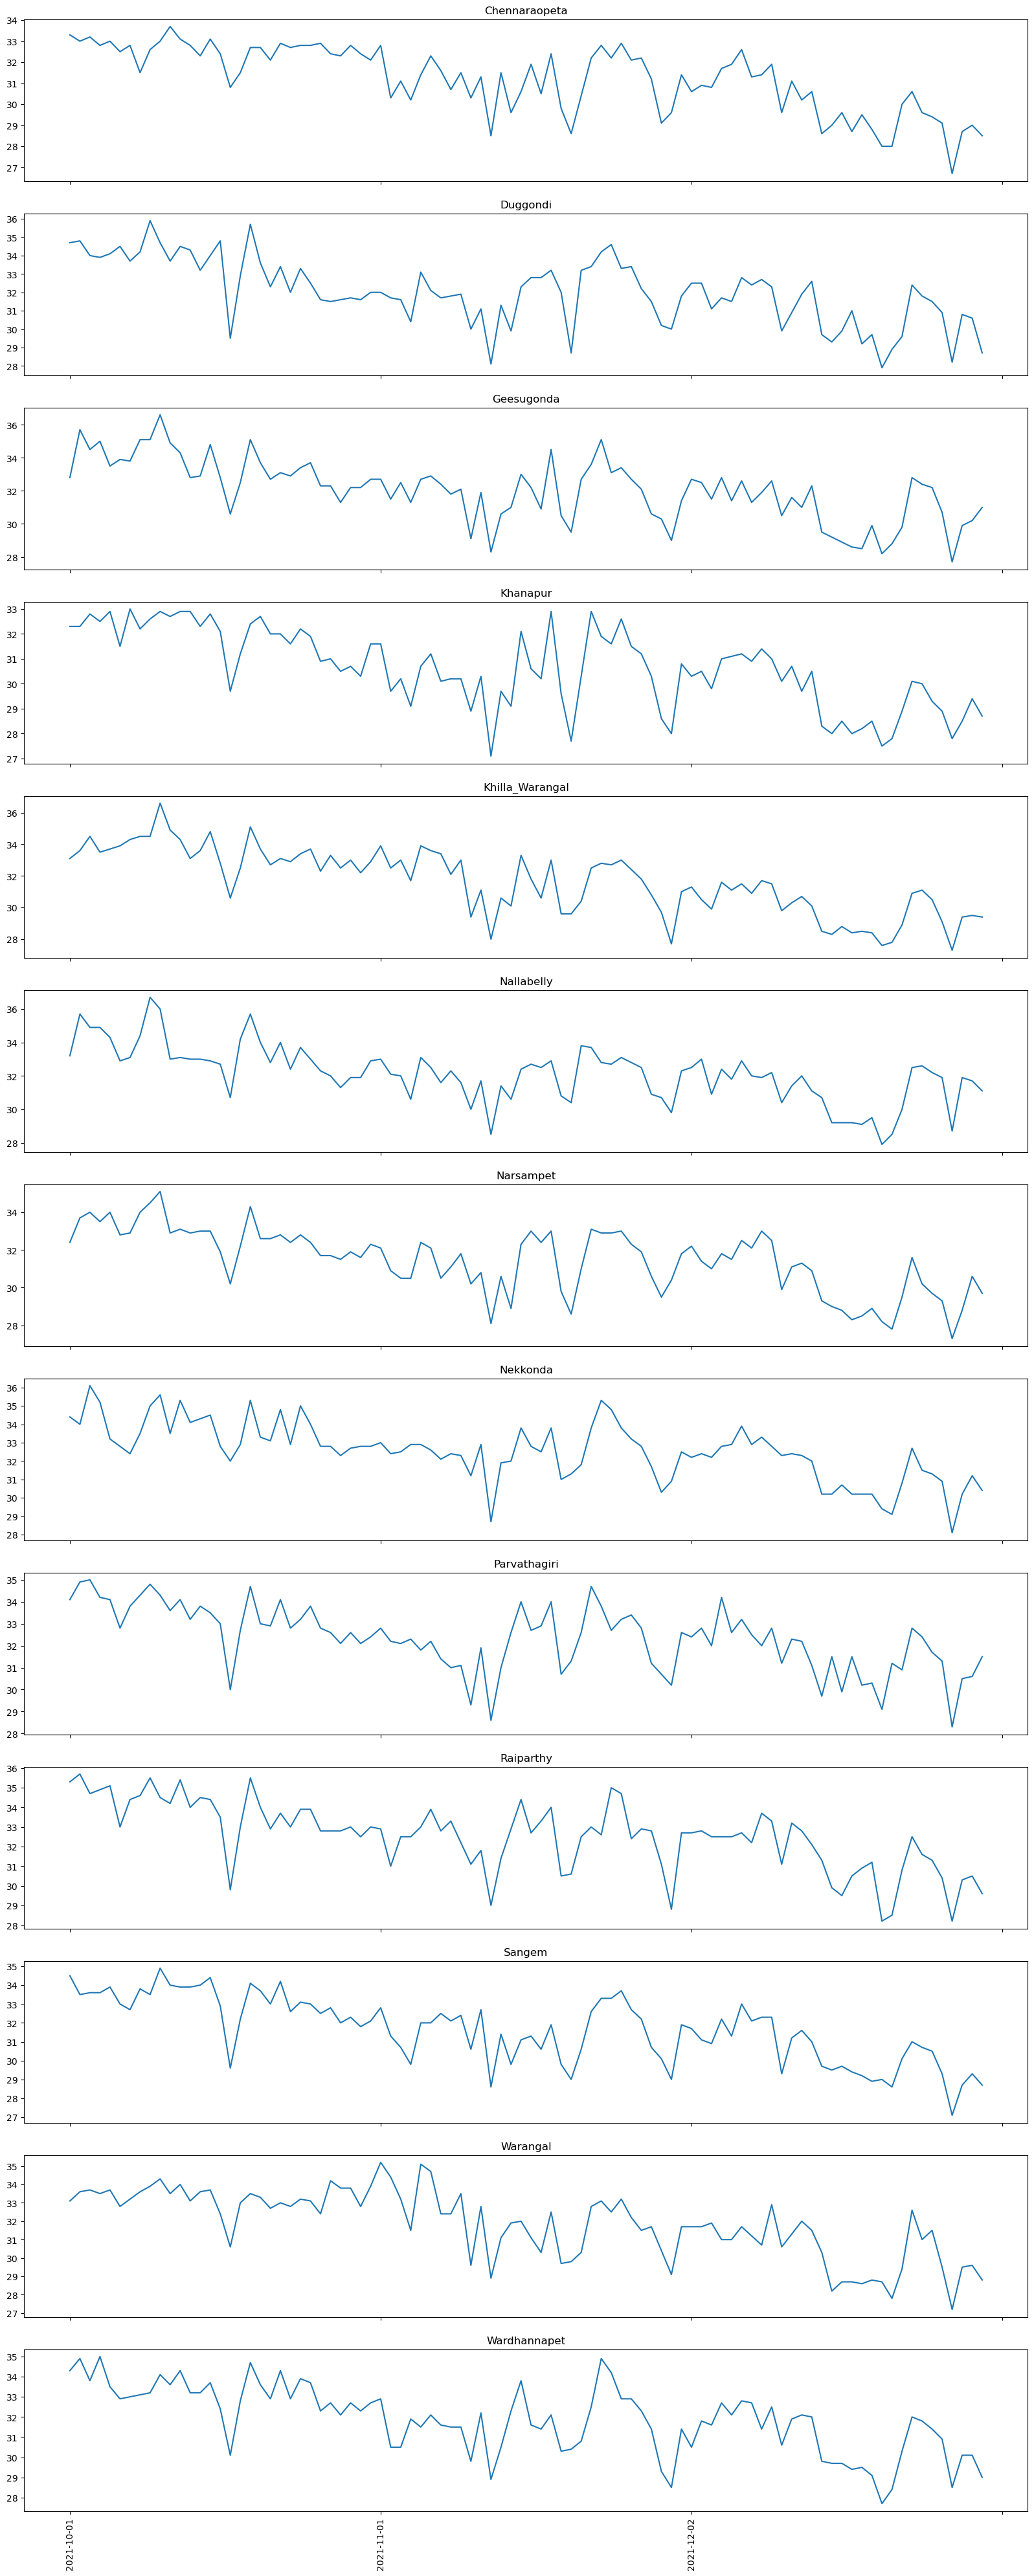

In [13]:
ploter(2021,"Warangal",feat_list[5])

In [34]:
def usable_mandal(year,usable=False):   # Mandal Counter
    pa = 'Mandals/'
    if usable == True:
        pa = 'Mandals_usable/'
    for city in glob.glob(pa+str(year)+'/*'):
        i = 0
        j = 0
        for mandal in glob.glob(city+"/*"):
            df1 = pd.read_csv(mandal)
            i = i+1 if len(df1)>360  else i
            j=j+1
        ci = city.split('\\')[1]
        print(f'for {ci} we have {i} usable mandals in year {year} out of {j} mandals')

In [36]:
usable_mandal(2019)
print('\n')
usable_mandal(2020)
print('\n')
usable_mandal(2021)

for Adilabad we have 16 usable mandals in year 2019 out of 24 mandals
for Karimnagar we have 14 usable mandals in year 2019 out of 20 mandals
for Khammam we have 18 usable mandals in year 2019 out of 26 mandals
for Nizamabad we have 23 usable mandals in year 2019 out of 35 mandals
for Warangal Rural we have 0 usable mandals in year 2019 out of 16 mandals
for Warangal Urban we have 0 usable mandals in year 2019 out of 11 mandals


for Adilabad we have 18 usable mandals in year 2020 out of 18 mandals
for Karimnagar we have 16 usable mandals in year 2020 out of 16 mandals
for Khammam we have 21 usable mandals in year 2020 out of 21 mandals
for Nizamabad we have 29 usable mandals in year 2020 out of 30 mandals
for Warangal Rural we have 16 usable mandals in year 2020 out of 16 mandals
for Warangal Urban we have 11 usable mandals in year 2020 out of 11 mandals


for Adilabad we have 18 usable mandals in year 2021 out of 18 mandals
for Karimnagar we have 16 usable mandals in year 2021 out of

In [37]:
usable_mandal(2019, usable=True)
print('\n')
usable_mandal(2020, usable=True)
print('\n')
usable_mandal(2021, usable=True)

for Adilabad we have 16 usable mandals in year 2019 out of 16 mandals
for Karimnagar we have 14 usable mandals in year 2019 out of 14 mandals
for Khammam we have 18 usable mandals in year 2019 out of 18 mandals
for Nizamabad we have 23 usable mandals in year 2019 out of 23 mandals
for Warangal Rural we have 0 usable mandals in year 2019 out of 0 mandals
for Warangal Urban we have 0 usable mandals in year 2019 out of 0 mandals


for Adilabad we have 18 usable mandals in year 2020 out of 18 mandals
for Karimnagar we have 16 usable mandals in year 2020 out of 16 mandals
for Khammam we have 21 usable mandals in year 2020 out of 21 mandals
for Nizamabad we have 29 usable mandals in year 2020 out of 29 mandals
for Warangal Rural we have 16 usable mandals in year 2020 out of 16 mandals
for Warangal Urban we have 11 usable mandals in year 2020 out of 11 mandals


for Adilabad we have 18 usable mandals in year 2021 out of 18 mandals
for Karimnagar we have 16 usable mandals in year 2021 out of 1

In [3]:
city = ["Adilabad", "Nizamabad", "Warangal Rural",             # Dict creator for union of mandals
            'Warangal Urban', "Karimnagar","Khammam","Warangal"]   
paths = []
pas_ = []
use = {}

for ci in city:
    for year in glob.glob("Mandals_usable/*"):
        pas_ = []
        for som in glob.glob(year+'/'+ci+'/*'):
            pas_.append(som.split('\\')[2][:-4])
        paths.append(pas_)
    use[ci] = list(set(paths[0]) & set(paths[1]) & set(paths[2]))

In [2]:
city = ["Adilabad", "Nizamabad", "Warangal Rural", 'Warangal Urban', "Karimnagar","Khammam","Warangal"]

use = {}

for ci in city:
    paths = []
    for year in glob.glob("Mandals_usable/*"):
        pas_ = []
        for som in glob.glob(year+'/'+ci+'/*'):
            pas_.append(som.split('\\')[2][:-4])
        paths.append(pas_)
    use[ci] = list(set(paths[0]) & set(paths[1]) & set(paths[2]) & set(paths[3]))

In [3]:
for ci in city:
    df1 = pd.DataFrame()
    for year in glob.glob("Mandals_usable/*"):
        for mands in use[ci]:
            df2 = pd.read_csv(year +'/'+ ci + '/' + mands + '.csv')
            df1 = pd.concat([df1,df2])
    df1.to_csv(ci+'.csv')